# Pearson correlation coefficient
Analysis on market_data1

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import figure

In [25]:
# Read market data 1
market_data1 = pd.read_csv("midpoint_log.txt")

market_data1.columns = ['Instrument', 'Price']

# Split dataframe into seperate instruments
instrument0_midpoint_price = market_data1[market_data1['Instrument'] == 0]
instrument1_midpoint_price = market_data1[market_data1['Instrument'] == 1] 

instrument0_midpoint_price = instrument0_midpoint_price.reset_index()
instrument0_midpoint_price = instrument0_midpoint_price['Price'][:-1]

instrument1_midpoint_price = instrument1_midpoint_price.reset_index()
instrument1_midpoint_price = instrument1_midpoint_price['Price']

Text(0, 0.5, 'Price')

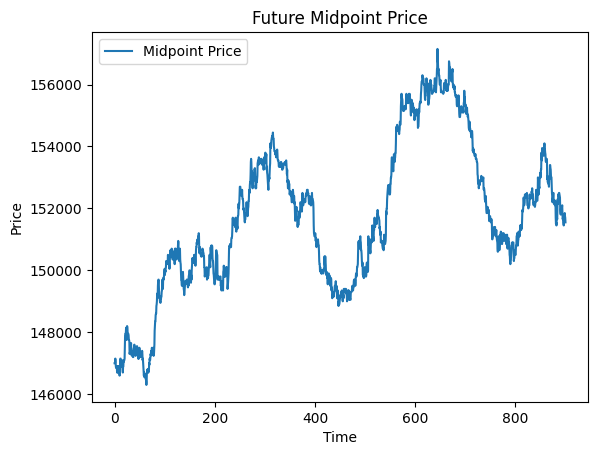

In [26]:
x = np.arange(0, instrument0_midpoint_price.size/2, 0.5)
plt.plot(x, instrument0_midpoint_price, label="Midpoint Price")
plt.legend()
plt.title("Future Midpoint Price")
plt.xlabel("Time")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

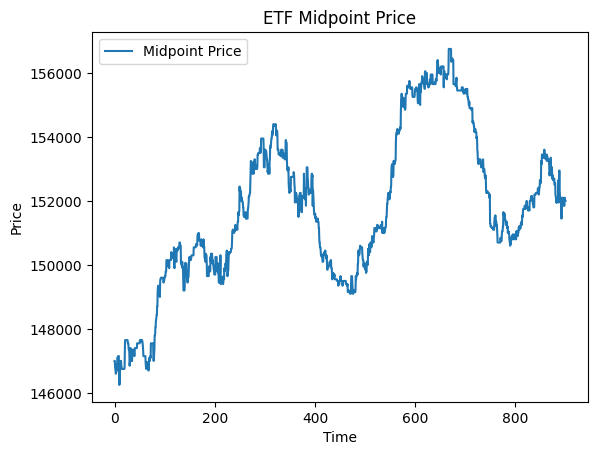

In [27]:
x = np.arange(0, instrument1_midpoint_price.size/2, 0.5)
plt.plot(x, instrument1_midpoint_price, label="Midpoint Price")
plt.legend()
plt.title("ETF Midpoint Price")
plt.xlabel("Time")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

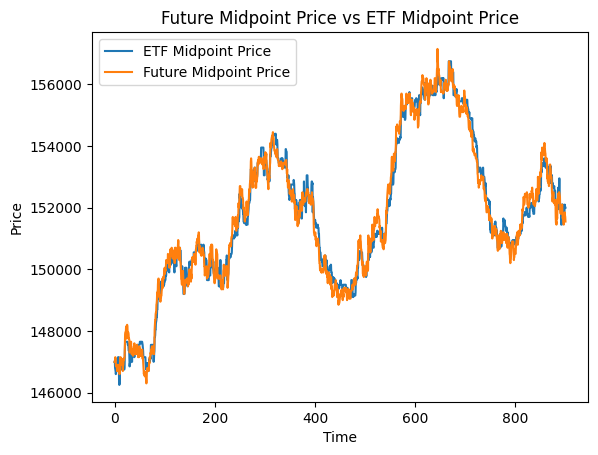

In [28]:
plt.plot(x, instrument1_midpoint_price, label="ETF Midpoint Price")
plt.plot(x, instrument0_midpoint_price, label="Future Midpoint Price")


plt.legend()
plt.title("Future Midpoint Price vs ETF Midpoint Price")
plt.xlabel("Time")
plt.ylabel("Price")

In [29]:
prices = pd.concat([instrument0_midpoint_price, instrument1_midpoint_price], axis=1)
print(prices)

print(prices.corr())

       Price   Price
0     147000  147000
1     147000  147000
2     147000  146800
3     147150  146750
4     147050  146700
...      ...     ...
1796  151650  151850
1797  151850  152100
1798  151750  152000
1799  151700  152000
1800  151550  152000

[1801 rows x 2 columns]
          Price     Price
Price  1.000000  0.990935
Price  0.990935  1.000000


# MEAN REVERSION

Lets look at the spread of data. 

From now on, Im only going to use the first 200 seconds

## spread

Text(0.5, 1.0, 'Spread between ETF and Future')

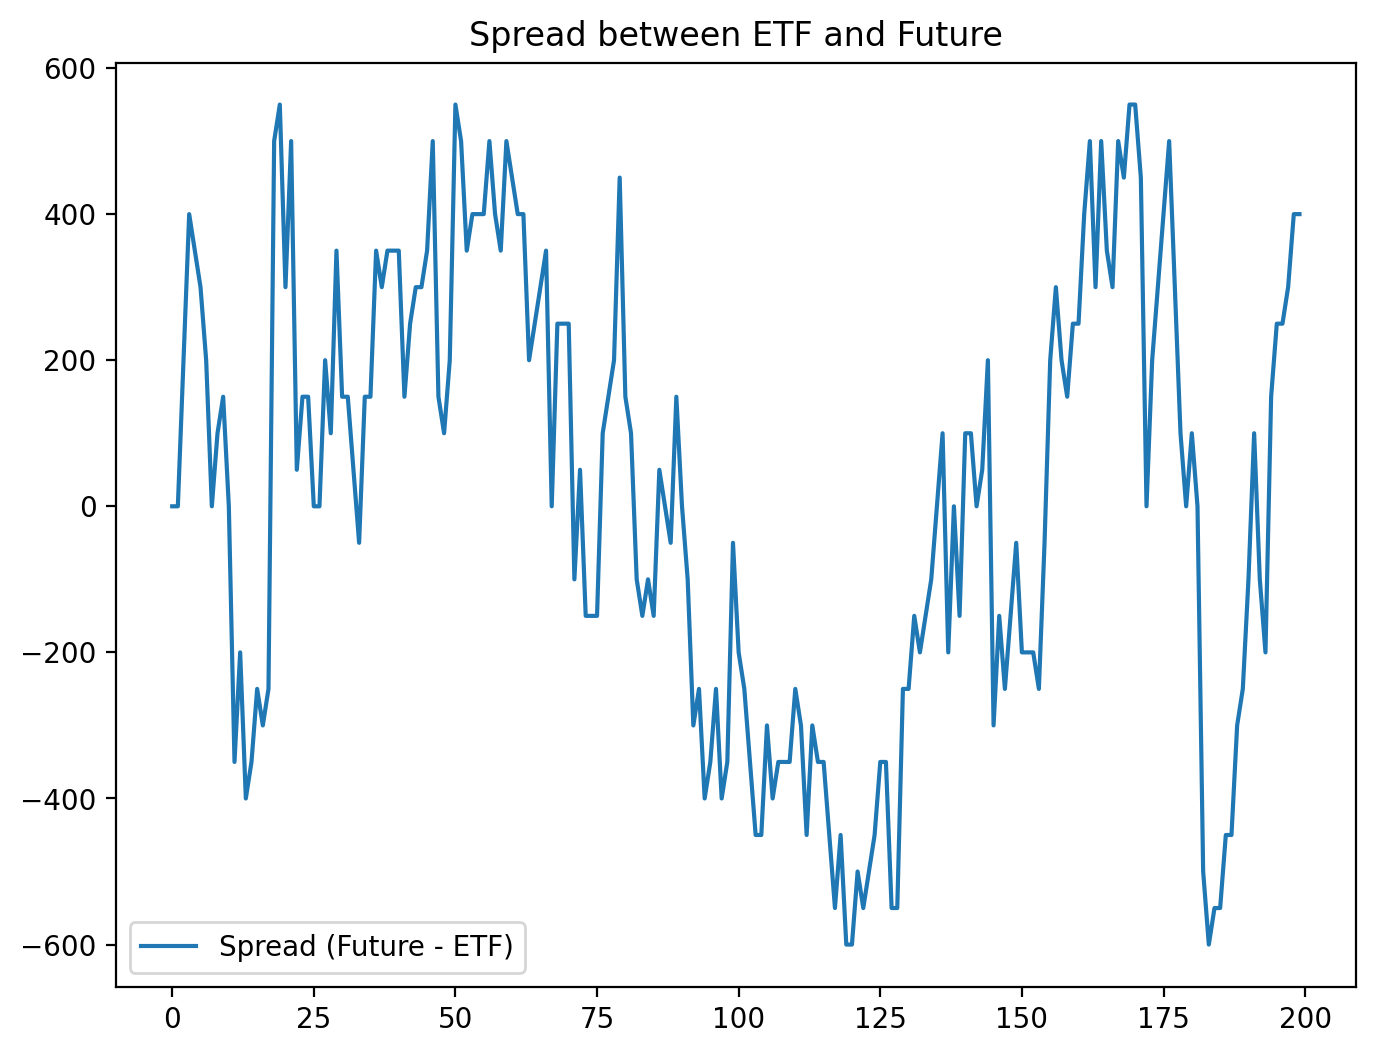

In [30]:
from matplotlib.pyplot import figure
FuturePrices = instrument0_midpoint_price[:200]
ETFPrices = instrument1_midpoint_price[:200]
figure(figsize=(8, 6), dpi=200)
plt.plot(FuturePrices - ETFPrices, label = 'Spread (Future - ETF)')
plt.legend()
plt.title("Spread between ETF and Future")


# ratio

Text(0.5, 1.0, 'Price Ratio between Future and ETF')

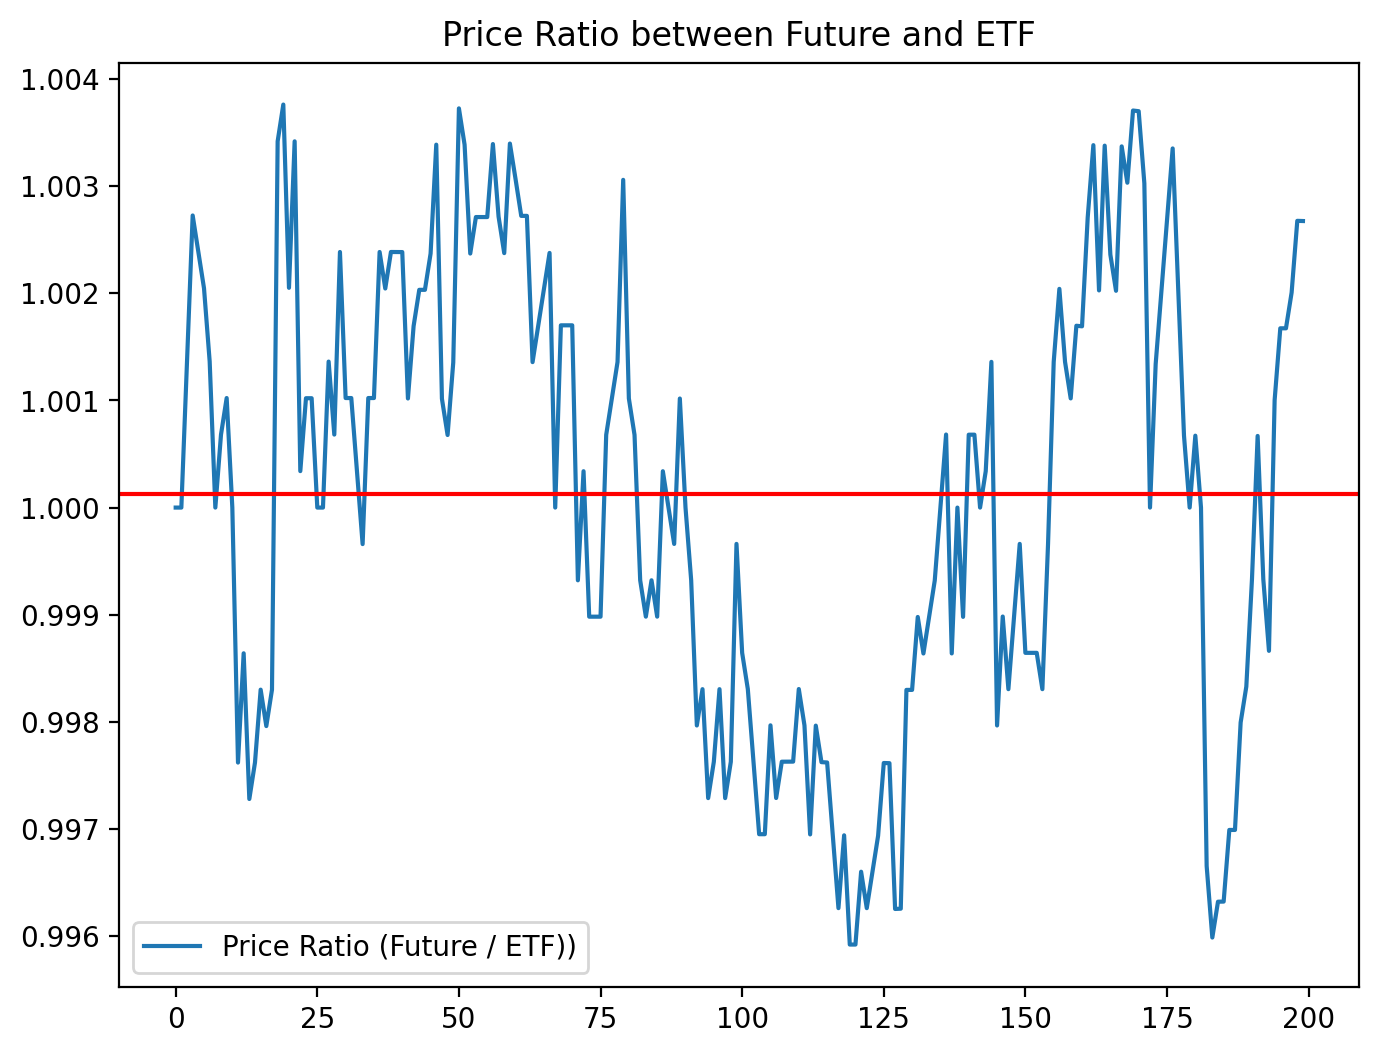

In [31]:
figure(figsize=(8, 6), dpi=200)
ratio = FuturePrices / ETFPrices
plt.plot(ratio, label = 'Price Ratio (Future / ETF))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between Future and ETF")

Z-score

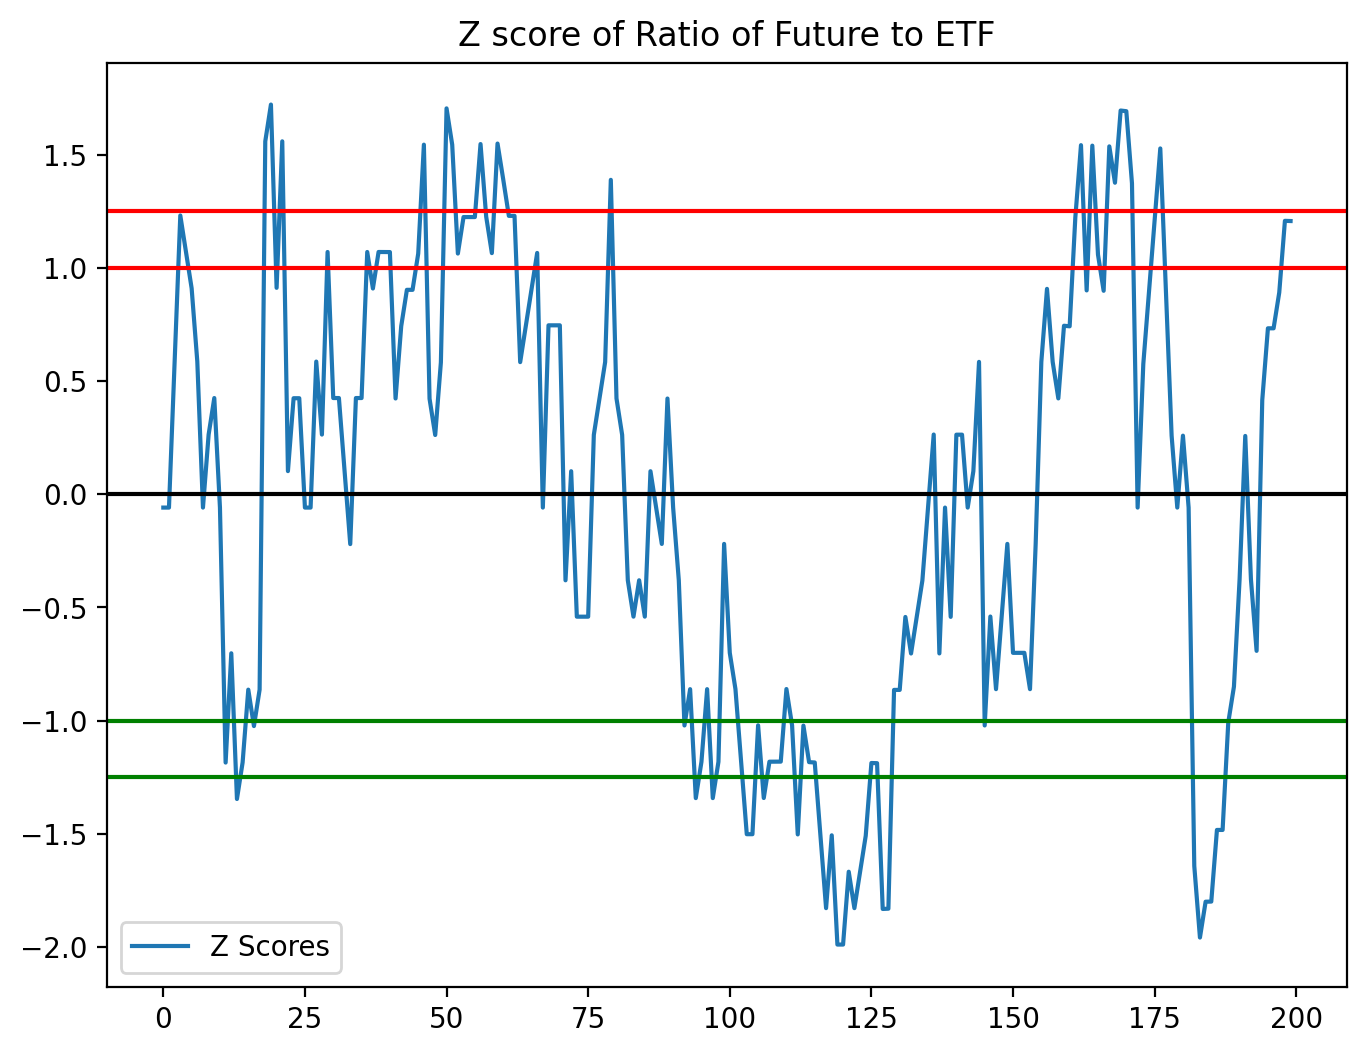

In [32]:
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Future to ETF')
plt.show()

Now lets look at moving averages

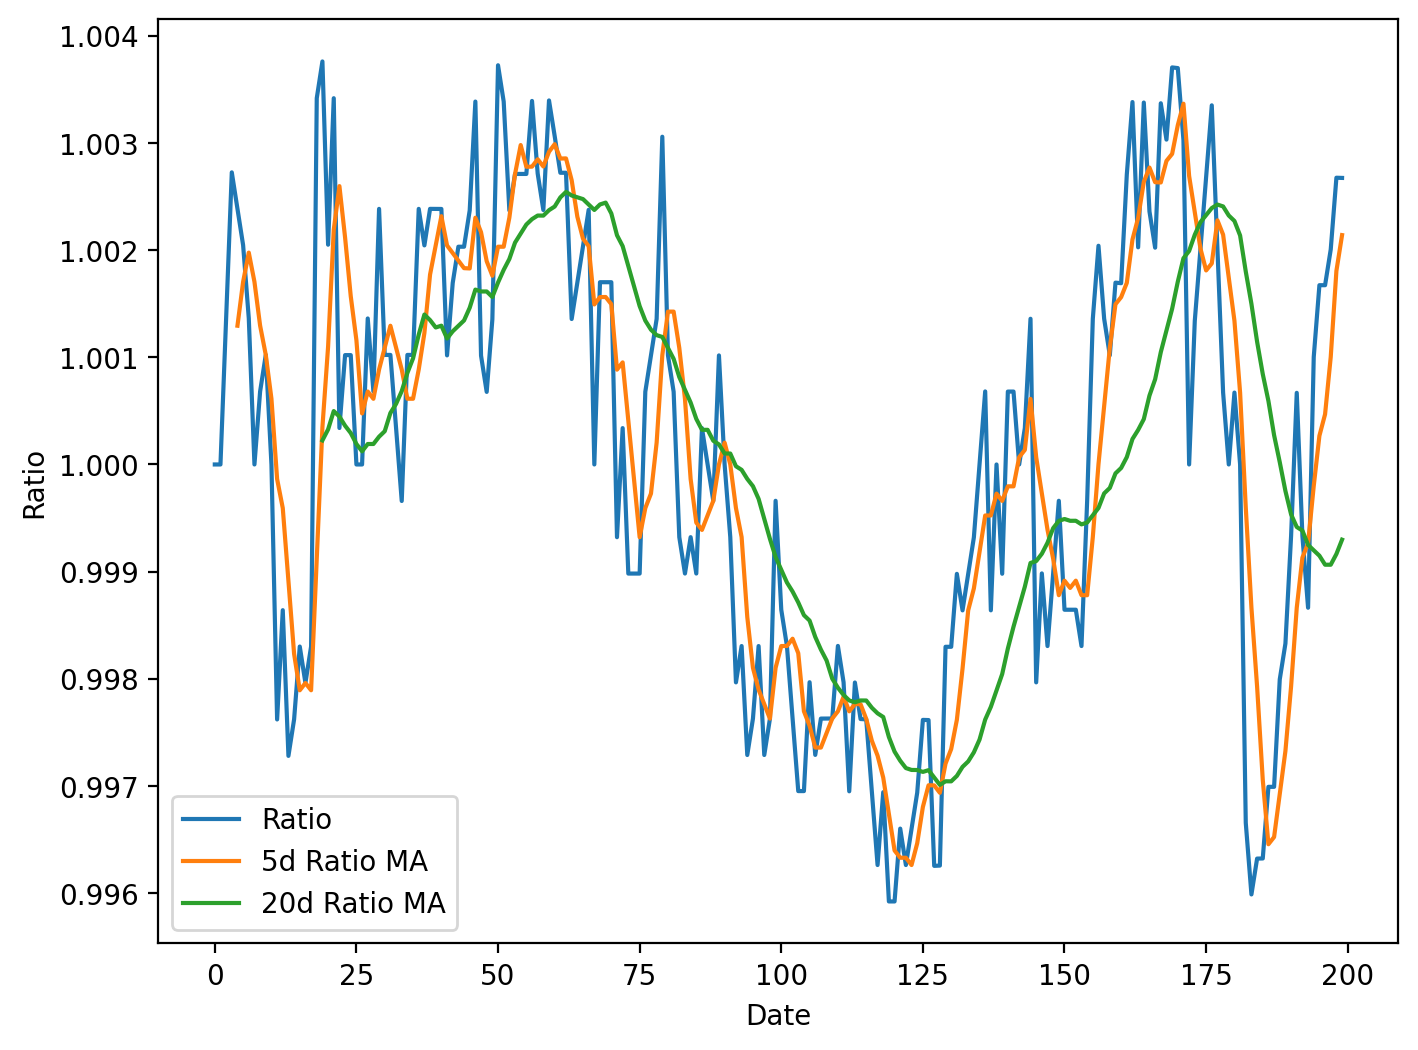

In [33]:
# print('Do the splits check out?',len(train) + len(test) == len(ratio))
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

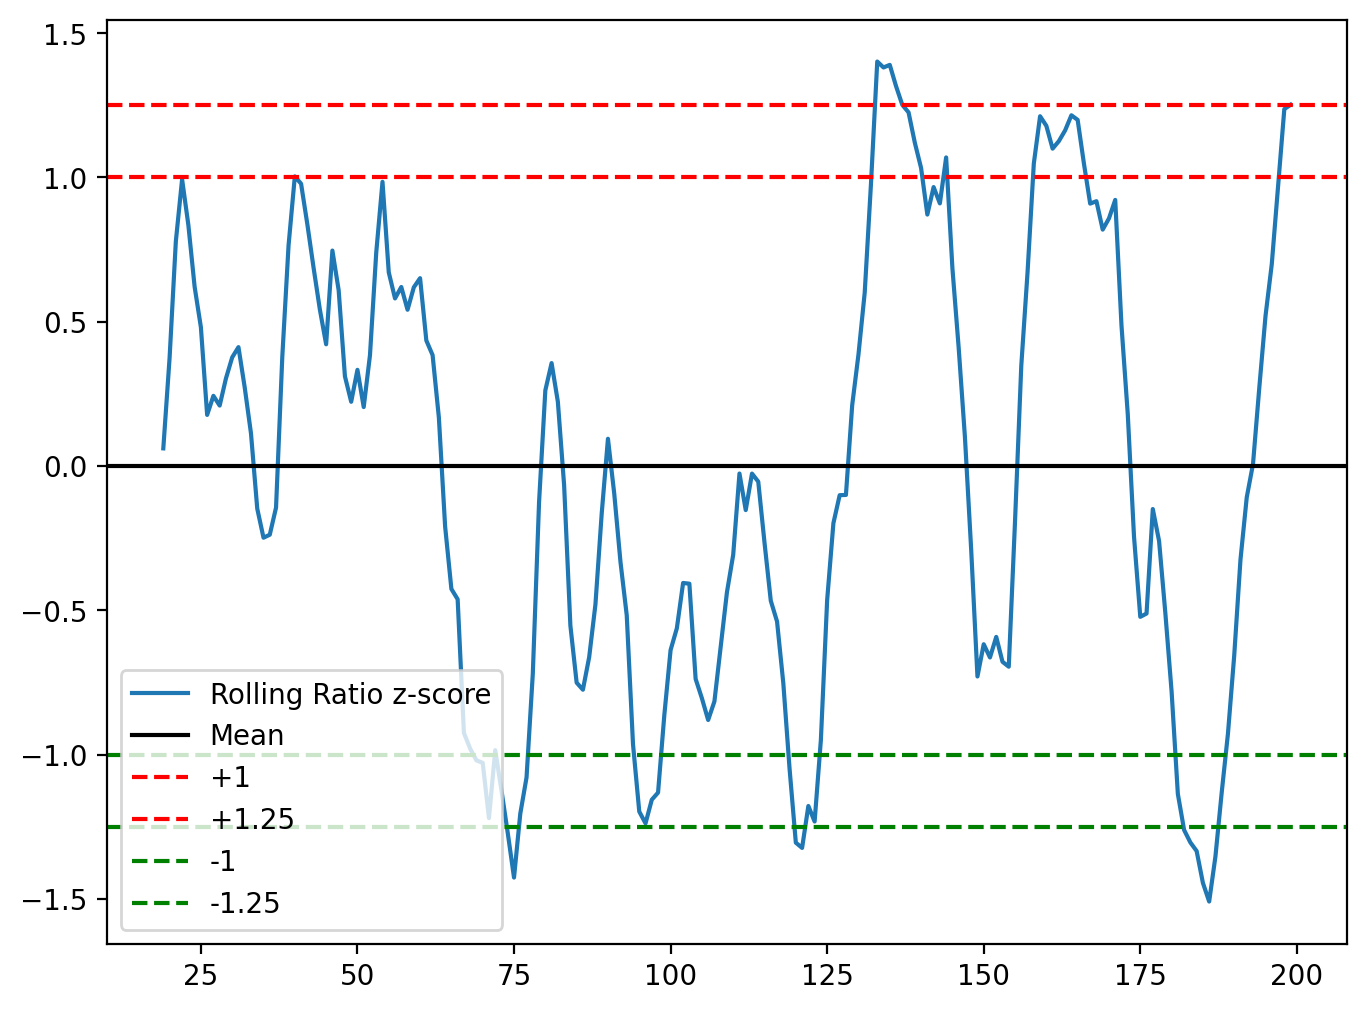

In [34]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

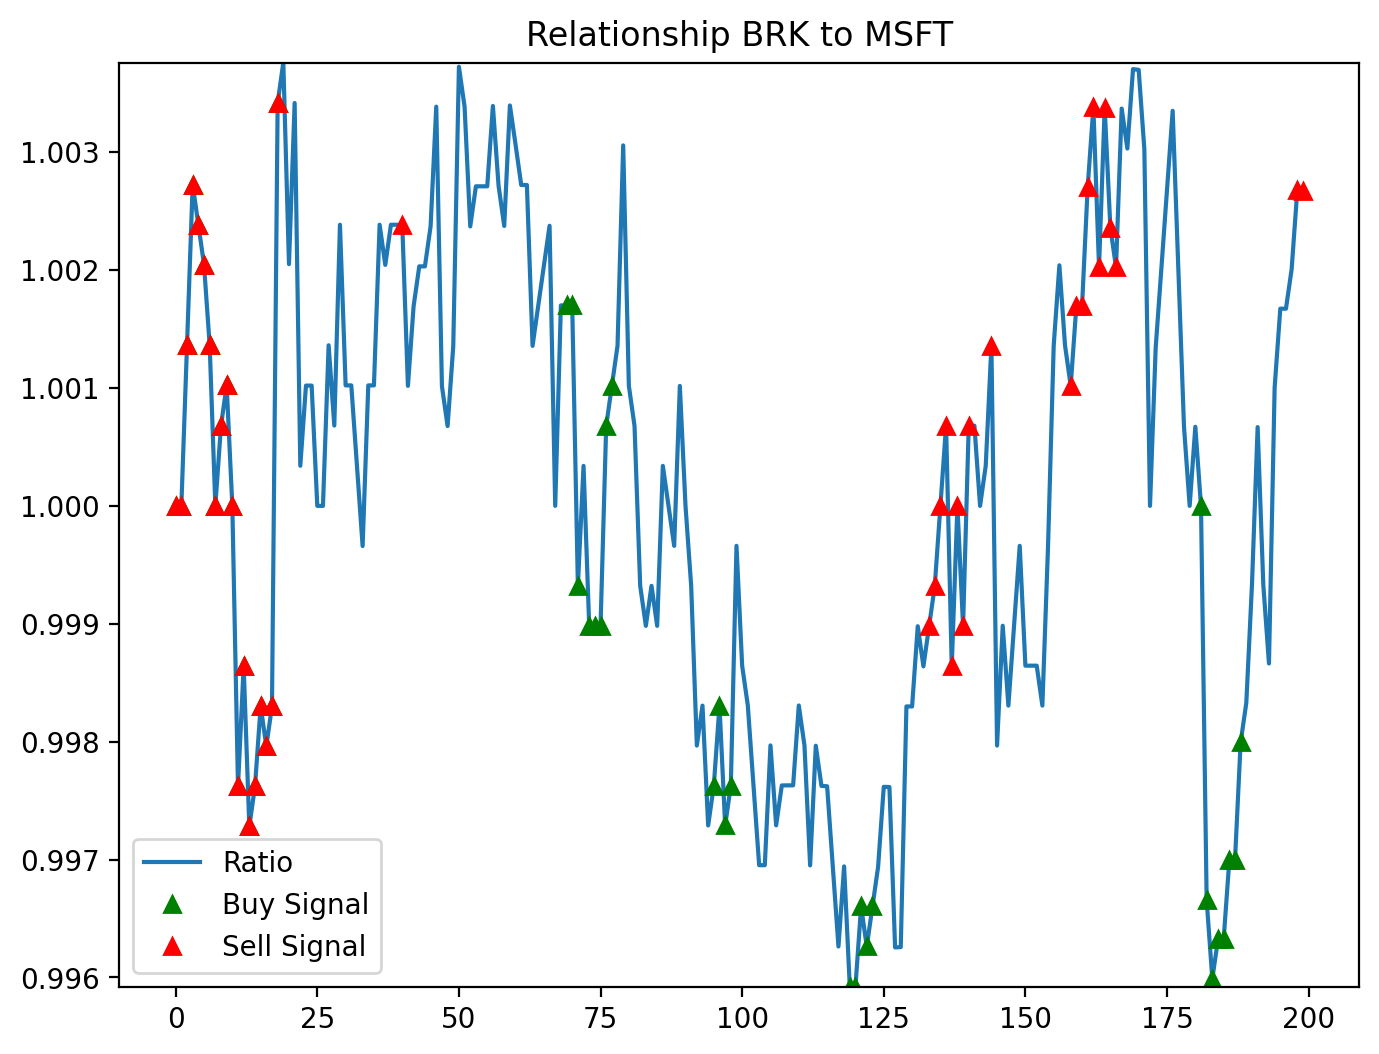

In [35]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship Future to ETF')
plt.show()